## 了解 RAG 中的 Embedding Vectors
1. 什么是embedding
2. Sentence BERT
3. 如何选取 embedding model

## 什么是embedding
考虑一下如何表示“男人',“女人',我们可以从性别上出发,假设男性性别可以表示'1’, 女性性别可以表示为’9',即可将“男人',“女人'区分开来那么当加入'男孩',“女孩'的时候,单纯靠性别已经无法完全区分上述四个单词,此时可以引入年龄,'男人':[1.35],“女人':[9,35],“男孩':[1,10],“女孩':[19,10]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 定义字体
plt.rcParams['font.sans-serif']=['Kaitt', 'simHei']
# 定义负号显示
plt.rcParams['axes.unicode_minus']= False

#定义点的坐标和标签
points ={
    '男人':[1,35],
    '女人':[9,35],
    '男孩':[1,10],
    '女孩':[9,10]
}

x_values = [point[0] for point in points.values()]
y_values =[point[1] for point in points.values()]
labels = list(points.keys())

plt.figure(figsize=(4,3))
for i,label in enumerate(labels):
    plt.scatter(x_values[i],y_values[i],label=label)
    
#设置x轴和Y轴的范围和精度
plt.xlim([0,10])
plt.ylim([0,50])
plt.xticks(np.arange(0,10,1))
plt.yticks(np.arange(0,50,10))

#添加标签
for i, label in enumerate(labels):
    plt.annotate(label, (x_values[i], y_values[i]), textcoords='offset points', xytext=(0,10), ha='center')
#设置图表标题和坐标轴标签
plt.title('embedding')
plt.xlabel('性别')
plt.ylabel('年龄')#显示图例
plt.legend()
# 显示图表
plt.show()

随着词汇的逐渐增加，二维已经不足以区分单词，例如引入新的单词“国王'，“皇后',只靠年龄和性别，已经无法区分国王 -- 男人， 皇后，女人
所以我们引入新的特征，例如'皇室的'，则“男人':[1,35,1],“女人':[9,35,1],“男孩':[1,10,11],“'女孩':[9,10,1],'国王':[1,35,91],“'皇后':[9,35,9]

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# # 定义字体
# plt.rcParams['font.sans-serif']=['Kaitt', 'simHei']
# # 定义负号显示
# plt.rcParams['axes.unicode_minus']= False

points = {
    '男人': [1, 35, 1],
    '女人': [9, 35, 1],
    '男孩': [1, 10, 1],
    '女孩': [9, 10, 1],
    '国王': [1, 35, 9],
    '皇后': [9, 35, 9],
}
x_coords = [point[0] for point in points.values()]
y_coords = [point[1] for point in points.values()]
z_coords = [point[2] for point in points.values()]
labels = list(points.keys())

# 创建图形和三维坐标轴
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

for i, label in enumerate(labels):
    ax.scatter(
        # x_coords[i], y_coords[i], z_coords[i], color=colors[i], label=label, s=50
        x_coords[i], y_coords[i], z_coords[i], label=label, s=50
    )

# 为每个点添加标签，并设置偏移量
for i, label in enumerate(labels):
    ax.text(
        x_coords[i],
        y_coords[i],
        z_coords[i],
        label,
        fontsize=15,
        horizontalalignment='left',
        verticalalignment='bottom',
    )

# 设置标签
ax.set_xlabel('性别')
ax.set_ylabel('年龄')
ax.set_zlabel('皇室')
# 调整视角
ax.view_init(elev=25.0, azim=-15)
# 显示图形
plt.show()

embedding 模型选取

m3e 模型

In [37]:
from sentence_transformers import SentenceTransformer

# model = SentenceTransformer('all-MiniLM-L6-v2')
model = SentenceTransformer('moka-ai/m3e-base')

#Our sentences we like to encode
sentences =['为什么良好的睡眠对健康至关重要?',
'良好的睡眠有助于身体修复自身,增强免疫系统',
'在监督学习中，算法经常需要大量的标记数据来进行有效学习',
'睡眠不足可能导致长期健康问题,如心脏病和糖尿病',
'这种学习方法依赖于数据质量和数量',
'它帮助维持正常的新陈代谢和体重控制',
'睡眠对儿童和青少年的大脑发育和成长尤为重要',
'良好的睡眠有助于提高日间的工作效率和注意力',
'监督学习的成功取决于特征选择和算法的选择',
'量子计算机的发展仍处于早期阶段，面临技术和物理挑战',
'量子计算机与传统计算机不同，后者使用二进制位进行计算',
'机器学习使我睡不着觉']
#Sentences are encoded by calling model.encode()
embeddings =model.encode(sentences)


In [3]:
len(embeddings[1])

768

In [4]:
from sklearn.manifold import TSNE
import numpy as np

# 使用 TSNE 进行降维, perplexity 空阔度，根据样本大小来选择，一般取值在 5 到 50 之间
tsne = TSNE(n_components=2, perplexity=5)
embeddings_2d=tsne.fit_transform(embeddings)

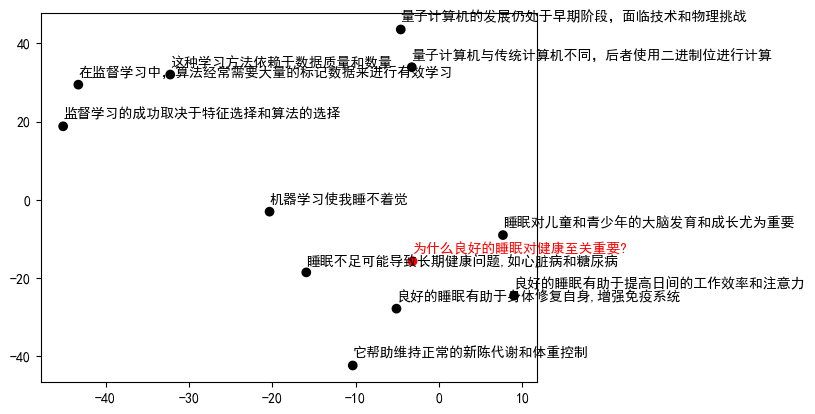

In [5]:
import matplotlib.pyplot as plt
# 定义字体
plt.rcParams['font.sans-serif']=['Kaitt', 'simHei']
# 定义负号显示
plt.rcParams['axes.unicode_minus']= False
             
color_list =['black'] * len(embeddings_2d[1:])
color_list.insert(0,'red')

plt.scatter(embeddings_2d[:,0],embeddings_2d[:,1],color=color_list )

for i in range(len(embeddings_2d)):
    plt.text(embeddings_2d[:,0][i], embeddings_2d[:,1][i]+2, sentences[i], color=color_list[i])
    
#显示图表
plt.show()

In [6]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')
# model = SentenceTransformer('moka-ai/m3e-base')

#Sentences are encoded by calling model.encode()
embeddings2 =model.encode(sentences)

In [41]:
# print(embeddings2[0])
print(type(embeddings2))

<class 'numpy.ndarray'>


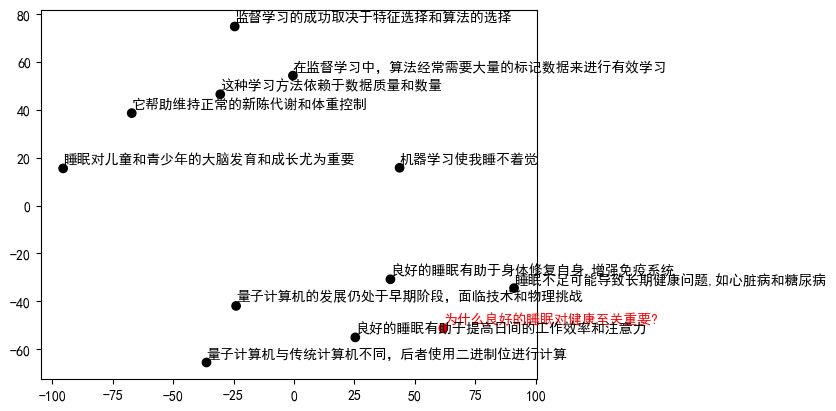

In [7]:
from sklearn.manifold import TSNE
import numpy as np

# 使用 TSNE 进行降维, perplexity 空阔度，根据样本大小来选择，一般取值在 5 到 50 之间
tsne = TSNE(n_components=2, perplexity=5)
embeddings_2d=tsne.fit_transform(embeddings2)

import matplotlib.pyplot as plt
# 定义字体
plt.rcParams['font.sans-serif']=['Kaitt', 'simHei']
# 定义负号显示
plt.rcParams['axes.unicode_minus']= False
             
color_list =['black'] * len(embeddings_2d[1:])
color_list.insert(0,'red')

plt.scatter(embeddings_2d[:,0],embeddings_2d[:,1],color=color_list )

for i in range(len(embeddings_2d)):
    plt.text(embeddings_2d[:,0][i], embeddings_2d[:,1][i]+2, sentences[i], color=color_list[i])
    
#显示图表
plt.show()

In [43]:
import requests
import numpy as np

def get_ollama_embedding(text, model_name="nomic-embed-text"):
    response = requests.post(
        "http://192.168.0.245:11434/api/embeddings",
        json={
            "model": model_name,
            "prompt": text
        }
    )
    return response.json()["embedding"]

embeddings3 = []
for index, sentence in enumerate(sentences):
    sentence_embeddings = list(get_ollama_embedding(sentence))
    print(f"index = {index} {sentence}, {sentence_embeddings}")
    embeddings3.append(sentence_embeddings)
embeddings3 = np.array(embeddings3, dtype=float)

index = 0 为什么良好的睡眠对健康至关重要?, [0.6700858473777771, 0.5923477411270142, -3.9465279579162598, -0.13574758172035217, 0.144346222281456, 0.7784222364425659, -0.3967578411102295, -0.2635068893432617, -0.6063451766967773, -1.0891389846801758, -0.6835174560546875, -0.22411426901817322, -0.2897157073020935, 0.702655553817749, 0.7806126475334167, -1.9060847759246826, 0.1717766672372818, -0.9109914302825928, -1.4209458827972412, 0.5604886412620544, -0.47825050354003906, -0.02561638504266739, -1.024601697921753, -0.9436484575271606, 1.9856593608856201, 0.33528828620910645, 1.2755464315414429, 0.6606599688529968, 0.45130786299705505, -0.1435708999633789, 0.6914858818054199, -0.22099706530570984, 0.28764936327934265, -0.9418070912361145, -0.8828178644180298, 0.542182981967926, 0.13124504685401917, 1.7537238597869873, 0.13691651821136475, -0.11457662284374237, -0.019877735525369644, 0.9865362048149109, 0.9121279120445251, -1.1957350969314575, 0.72933030128479, 1.043885588645935, 1.1584872007369995, 1.

In [44]:
# print(embeddings3)
print(type(embeddings3))

<class 'numpy.ndarray'>


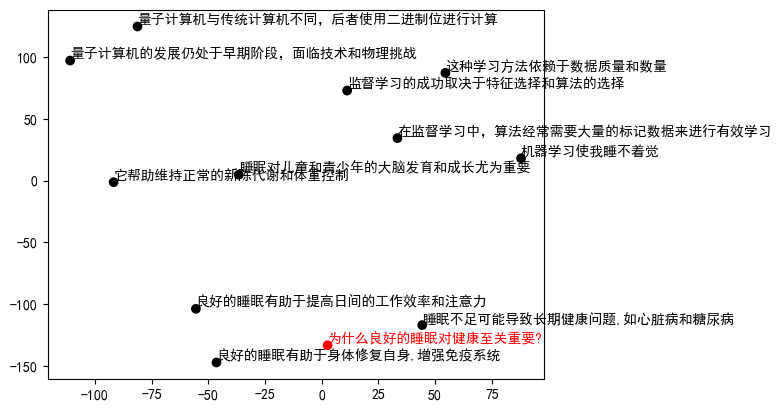

In [45]:
from sklearn.manifold import TSNE
import numpy as np

# 使用 TSNE 进行降维, perplexity 空阔度，根据样本大小来选择，一般取值在 5 到 50 之间
tsne = TSNE(n_components=2, perplexity=5)
embeddings_2d=tsne.fit_transform(embeddings3)

import matplotlib.pyplot as plt
# 定义字体
plt.rcParams['font.sans-serif']=['Kaitt', 'simHei']
# 定义负号显示
plt.rcParams['axes.unicode_minus']= False
             
color_list =['black'] * len(embeddings_2d[1:])
color_list.insert(0,'red')

plt.scatter(embeddings_2d[:,0],embeddings_2d[:,1],color=color_list )

for i in range(len(embeddings_2d)):
    plt.text(embeddings_2d[:,0][i], embeddings_2d[:,1][i]+2, sentences[i], color=color_list[i])
    
#显示图表
plt.show()